Da hab ich mal die Rechnung geschrieben und zum Teil geTeXt, ging irgendwie übersichtlicher. Hoffentlich blickst du da durch.


---

\begin{align*}
    0 &= -u_{C_{K} } - L_{S} \cdot \dot{i}_{L_{S} } - R_{S} \cdot i_{L_{S} } +U_{i} \\
    0 &= -u_{c_{K_{L} } } - L_{K} \cdot \dot{i}_{L_{K} } -R_{K} \cdot i_{L_{K} } +u_{C_{K} } \\
    0 &= -L_{L} \cdot \dot{i}_{L_{L} } +u_{C_{K_{L} } } \\
    0 &= i_{L_{S} } -C_{K} \cdot \dot{u}_{_{C_{K} } } -i_{L_{K} } \\
    0 &= i_{L_{K} } -C_{K_{L} } \cdot \dot{u}_{C_{K_{L} } } -\frac{u_{C_{K_{L} } }}{R_{L} } -i_{L_{L} }   
\end{align*}
---

\begin{align*}
    \dot{i}_{L_{S} } &= \frac{-u_{C_{K} } - R_{S} \cdot i_{L_{S} } +U_{i}}{L_{S} }  \\
    \dot{i}_{L_{K} } &= \frac{-u_{c_{K_{L} } } -R_{K} \cdot i_{L_{K} } +u_{C_{K} }}{L_{K} }  \\
    \dot{i}_{L_{L} }&= \frac{u_{C_{K_{L} } }}{L_{L} }  \\
    \dot{u}_{_{C_{K} } } &= \frac{i_{L_{S} }  -i_{L_{K} }}{C_{K} }  \\
    \dot{u}_{C_{K_{L} } } &= \frac{i_{L_{K} }  -\frac{u_{C_{K_{L} } }}{R_{L} } -i_{L_{L} }}{C_{K_{L} } }    
\end{align*}
---

\begin{align*}
    \dot{i}_{L_{S} } &= -\frac{R_{S} }{L_{S} } i_{L_{S } } -\frac{1}{_{L_{S} }}u_{C_{K} } +0+0 +0 +\frac{U_{i}}{L_{S} }\\
    \dot{u}_{_{C_{K} } } &= \frac{1}{C_{K} } i_{L_{S} } +0-\frac{1}{C_{K} } i_{L_{K} } +0+0\\
    \dot{i}_{L_{K} } &= 0+\frac{1}{L_{K} } u_{C_{K} } - \frac{R_{K} }{L_{K} } i_{L_{K} } -\frac{1}{L_{K} }u_{C_{K_{L}}} + 0\\
    \dot{u}_{C_{K_{L} } } &= 0+0+\frac{1}{C_{K_{L} } } i_{L_{K} }-\frac{1}{R_{L} \cdot C_{K_{L} } } u_{C_{K_{L} } } -\frac{1}{C_{K_{L} } } i_{L_{L} }\\
    \dot{i}_{L_{L} }&= 0+0+0+\frac{u_{C_{K_{L} } }}{L_{L} }+0
\end{align*}
---

$$
\begin{pmatrix}
\dot{i_{L_{S} } }\\
\dot{u_{C_{K} } }\\
\dot{i_{L_{K} } }\\
\dot{u_{C_{K_{L} } } }\\
\dot{i_{L_{L} } }\\
\end{pmatrix}=
\begin{pmatrix}
-\frac{R_{S} }{L_{S} } &-\frac{1}{_{L_{S} }}&0&0&0\\
\frac{1}{C_{K} } &0&-\frac{1}{C_{K} } &0&0\\
0 &\frac{1}{L_{K} }&- \frac{R_{K} }{L_{K} } &-\frac{1}{L_{K} }  & 0\\
0&0&\frac{1}{C_{K_{L} } } &-\frac{1}{R_{L} \cdot C_{K_{L} } }&-\frac{1}{C_{K_{L} } }\\
0&0&0&\frac{1}{L_{L} }&0
\end{pmatrix} \cdot 
\begin{pmatrix}
{i_{L_{S} } }\\
{u_{C_{K} } }\\
{i_{L_{K} } }\\
{u_{C_{K_{L} } } }\\
{i_{L_{L} } }\\
\end{pmatrix}+
\begin{pmatrix}
    \frac{U_{i}}{L_{S} }\\
    0\\
    0\\
    0\\
    0
\end{pmatrix}
$$

In [1]:
using DifferentialEquations
using PlotlyJS

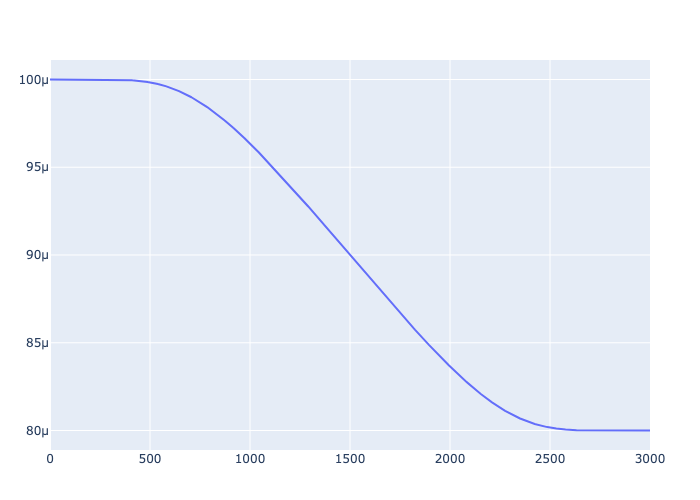

In [55]:
function f(x)
    if x>0
        exp(-1/x)
    else
        0
    end
end
g(x) = f(1-x)/(f(x)+f(1-x))
a = 3000
# p equals the percentage of beeing linear
p = 0.2
h(x) = p*0.0001*g(x/a)+0.0001*(1-p)

x = 0:0.1:a
y = h.(x)
plot(x,y)

In [56]:
R_S = 1.1e-3
R_K = 1e-3
R_L = 100
L_S = 70e-6
L_K(x) = h(x)
L_L = 1e-2
C_K = 1e-4/4
C_SK = C_K
C_L = 1e-2
C_KL = C_K+C_L
U_i = 250

A(x) = [-R_S/L_S -1/L_S 0 0 0
    1/C_SK 0 -1/C_SK 0 0
    0 1/L_K(x[3]) -R_K/L_K(x[3]) -1/L_K(x[3]) 0
    0 0 1/C_KL -1/(R_L*C_KL) -1/C_KL
    0 0 0 1/L_L 0]
B = [1/L_S;0;0;0;0]
u = U_i

function f(dx, x, p, t)
    dx.= A(x)*x+B*u
end

@show A

A = A


A (generic function with 1 method)

In [57]:
x0 = [0,0,0,0,0]
tspan = (0.0,0.1)
ts = 1e-5
prob = ODEProblem(f, x0, tspan)
alg = Tsit5()

sol = solve(prob, alg,reltol=1e-8, abstol=1e-8);

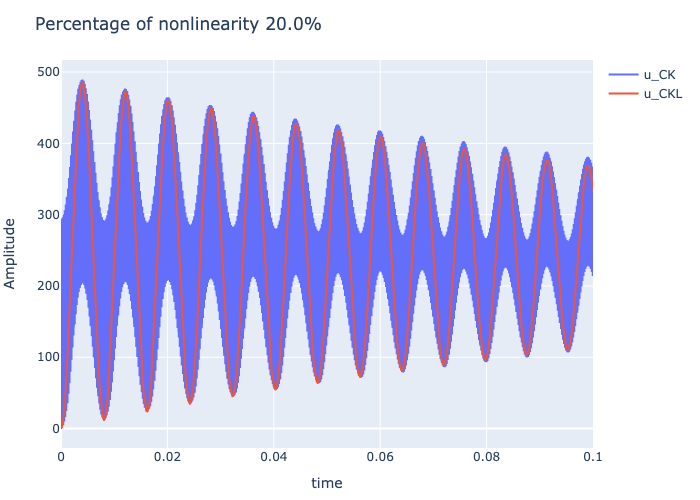

In [58]:
x = sol.u
x_plot(j) = [x[i][j] for i = 1:length(x)]
t = sol.t
a = ["i_LS","u_CK","i_LK","u_CKL","i_LL"]
trace(i) = scatter(x=t, y=x_plot(i), mode="lines",name = "$(a[i])")

layout = Layout(title="Percentage of nonlinearity $(p*100)%",xaxis_title="time", yaxis_title="Amplitude")

# plot([trace(1),trace(2),trace(3),trace(4),trace(5)], layout)
plot([trace(2),trace(4)], layout)